In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt

wczytanie danych i proba

In [2]:
ceny_df = pd.read_excel('ceny_stand.xlsx')
egzo_niestand_df = pd.read_excel('egzo_niestand.xlsx')

# Ustawienie daty jako indeks
ceny_df.set_index('Data', inplace=True)
egzo_niestand_df.set_index('Data', inplace=True)

# Ustawienie częstotliwości czasowej na godzinną
ceny_df.index = pd.to_datetime(ceny_df.index)
egzo_niestand_df.index = pd.to_datetime(egzo_niestand_df.index)
# Poprawienie nazw kolumn w DataFrame z danymi egzogenicznymi
exog_columns = ['Zachmurzenie', 'Prędkość wiatru', 'Temperatura powietrza', 'Opad', 'Zdolności produkcyjne', 'Zapotrzebowanie', 'Generacja źródeł wiatrowych', 'Generacja źródeł fotowoltaicznych']
exog_df = egzo_niestand_df[exog_columns]

# tworzenie pary testowej i treningowej     168 godzin jako 7 dni
train1 =  ceny_df[:len(ceny_df)-168]
test1 = ceny_df[len(ceny_df)-168:]
len(ceny_df) == len(train1) + len(test1) # True

# forecast start and end
# obtain predicted results
start1 = len(train1)
end1 = len(train1)+len(test1)-1

# vector of exogenous variable
exog_train = exog_df.iloc[:len(exog_df)-168] 
exog_forecast = exog_df.iloc[len(exog_df)-168:]

In [3]:
# probka dla autoarima
ceny_autoAr = ceny_df[-1500:]
exo_autoAr = exog_df[-1500:]

# we= ceny_autoAr.count()
# wa= exo_autoAr.count()

In [4]:
########################################################################### SARIMAX #################################################################

#SARIMAX (4, 1, 0) (2, 0, 0, 24)

In [5]:
# # Optymalizacja parametrów p, d, q przy użyciu pmdarima
# model = auto_arima(ceny_autoAr['Ceny energii'], exogenous=exo_autoAr, d=1, max_p=10, max_q=15, max_P=15, max_Q=15, max_order=None, seasonal=True, m=24)

# ### dla próbki 1500
# ### parametry: (4, 1, 0) (2, 0, 0, 24)

# # Wydrukowanie wybranych optymalnych parametrów modelu
# print("Optymalne parametry modelu:", model.order, model.seasonal_order)

In [4]:
# # Dopasowanie modelu SARIMAX
sarimax_model = SARIMAX(train1['Ceny energii'], exog=exog_train, order=(4, 1, 0), seasonal_order=(2, 0, 0, 24))
results = sarimax_model.fit()
# results.summary()

#prongnoza
predictions = results.predict(start=start1, end=end1, exog=exog_forecast).rename('SARIMAX(4,1,0) (2,0,0,24)')

C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions.to_excel('prognozy sarima.xlsx')

In [5]:
# Podsumowanie 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Ceny energii   No. Observations:                 3456
Model:             SARIMAX(4, 1, 0)x(2, 0, 0, 24)   Log Likelihood              -16224.001
Date:                            Sat, 02 Sep 2023   AIC                          32478.002
Time:                                    08:59:37   BIC                          32570.215
Sample:                                01-01-2023   HQIC                         32510.933
                                     - 05-24-2023                                         
Covariance Type:                              opg                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Zachmurzenie                         -1.6111      0.651     -2.476      0.013      -2.886      -0.336
Prędkość wiatru                     -12.2440      2.443     -5.012      0.000     -17.032      -7.456
Temperatura powietrza                -4.3299      1.456     -2.975      0.003      -7.183      -1.477
Opad                                 -1.4777      0.604     -2.445      0.014      -2.662      -0.293
Zdolności produkcyjne                -0.0013      0.001     -1.481      0.139      -0.003       0.000
Zapotrzebowanie                       0.0315      0.001     38.278      0.000       0.030       0.033
Generacja źródeł wiatrowych          -0.0118      0.002     -6.299      0.000      -0.016      -0.008
Generacja źródeł fotowoltaicznych    -0.0222      0.002    -14.477      0.000      -0.025      -0.019
ar.L1                                 0.0589      0.013      4.382      0.000       0.033       0.085
ar.L2                                -0.0179      0.016     -1.131      0.258      -0.049       0.013
ar.L3                                -0.1289      0.018     -7.254      0.000      -0.164      -0.094
ar.L4                                -0.0786      0.018     -4.308      0.000      -0.114      -0.043
ar.S.L24                              0.2362      0.014     16.957      0.000       0.209       0.264
ar.S.L48                              0.0862      0.015      5.589      0.000       0.056       0.116
sigma2                              719.8631     11.885     60.571      0.000     696.570     743.157
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):              2138.39
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.27
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

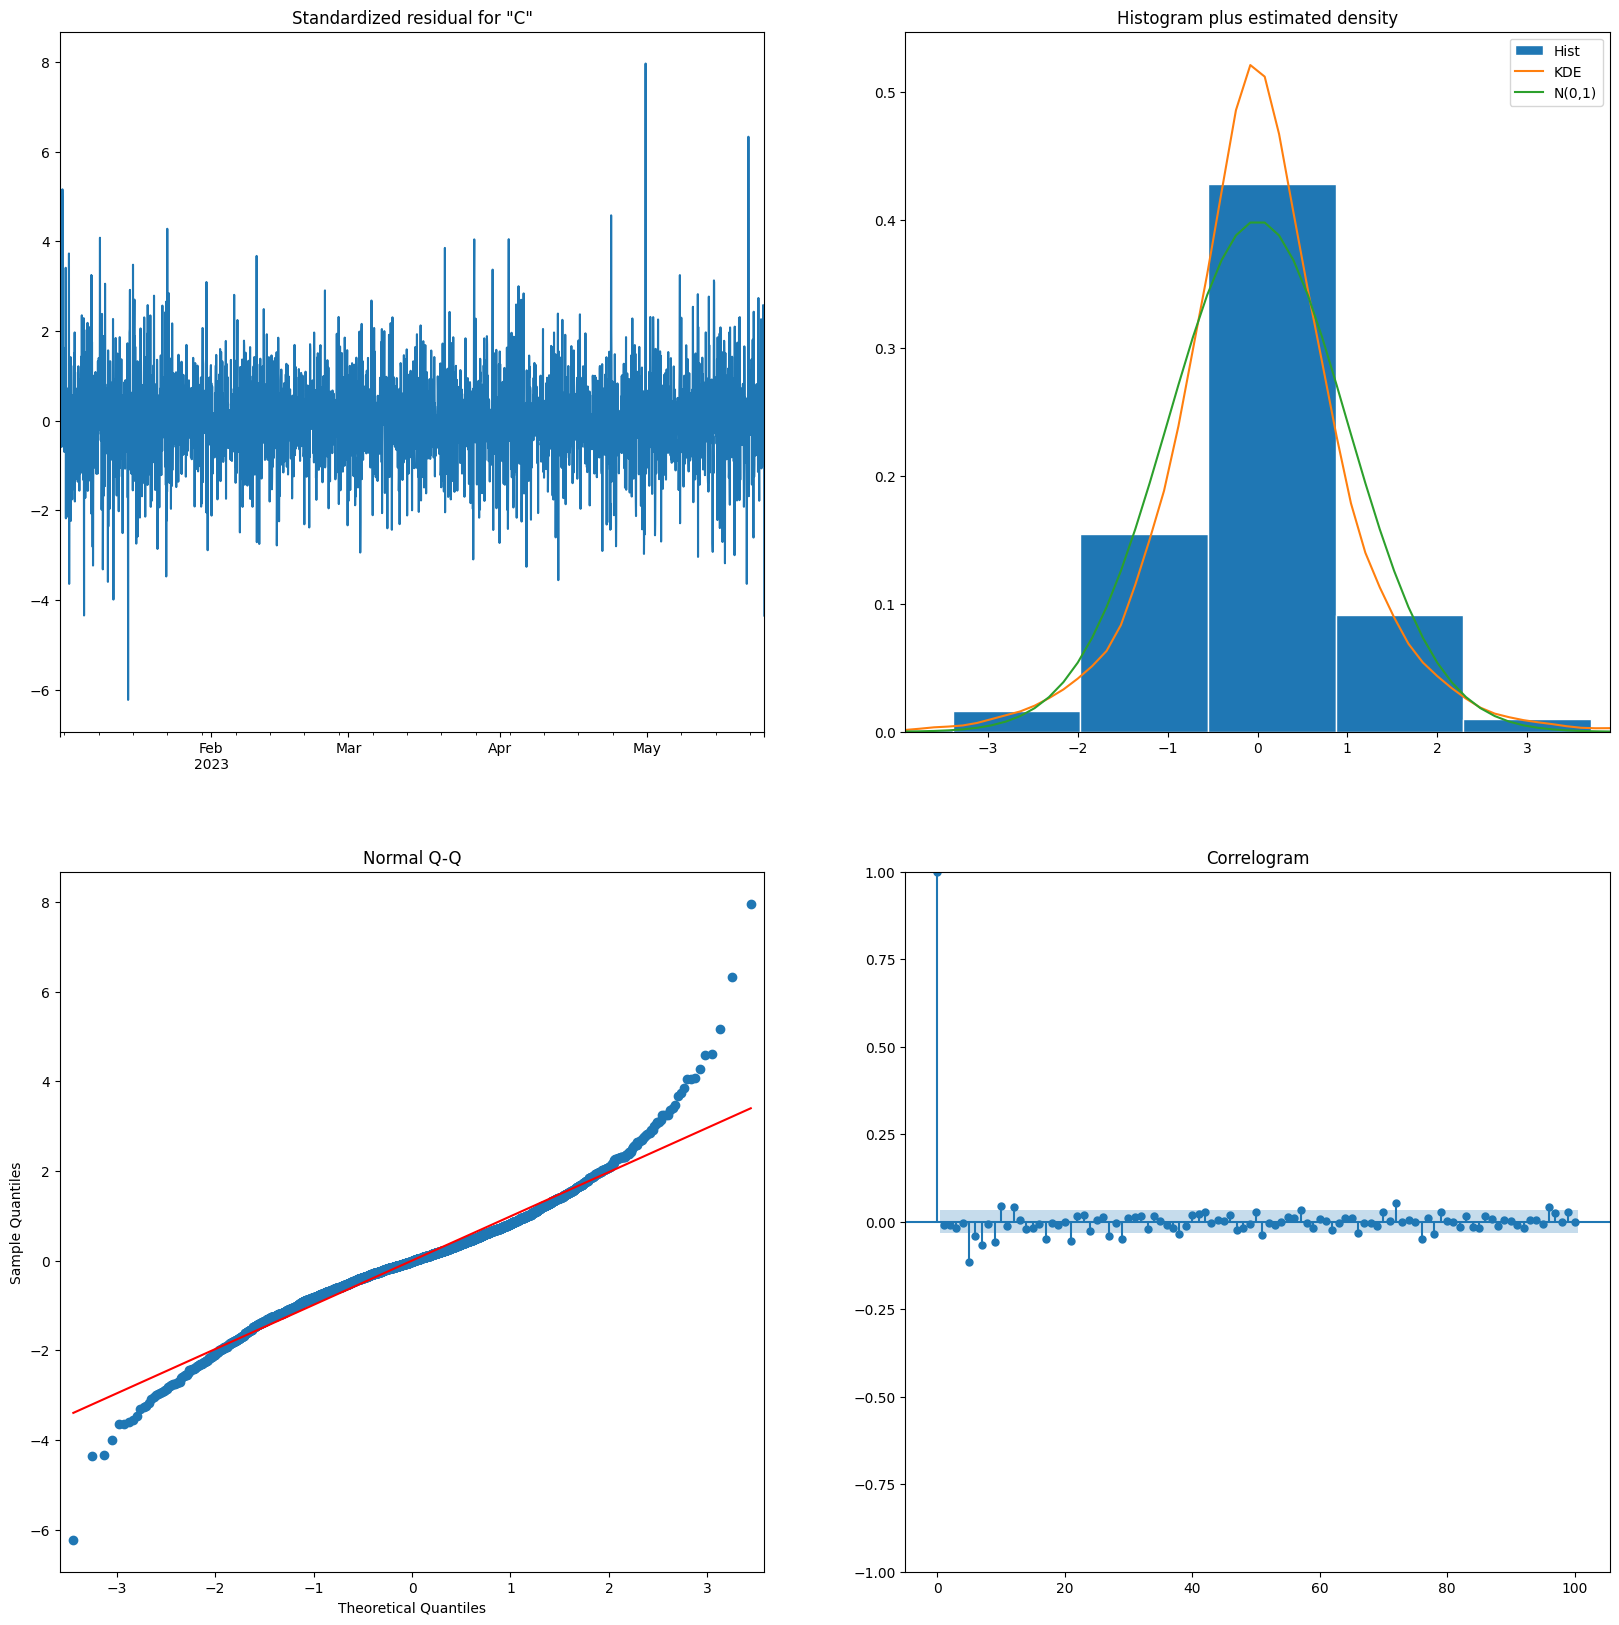

In [8]:
#wykres sarimax
# results.plot_diagnostics(figsize=(20,20))
# plt.show()
folder_wynik = r'C:\Users\mikol\OneDrive\Pulpit\data\prognozy\podsumowanie'
filename_wynik = f'wykresy diagnostyczne {predictions.name}.png'

fig = results.plot_diagnostics(figsize=(20, 20), lags=100)
fig.savefig(folder_wynik + '\\' + filename_wynik)


In [9]:
########################################################################### ARIMAX 1  #################################################################

ARIMAX 1 (2,1,1)  #################################################################

In [10]:
# # Optymalizacja p, d, q dla braku sezonowosci
# model1 = auto_arima(ceny_autoAr['Ceny energii'], exogenous=exo_autoAr, d=1, max_p=10, max_q=15, max_P=15, max_Q=15, max_order=None, seasonal=False)

# # Wydrukowanie wybranych optymalnych parametrów modelu
# print("Optymalne parametry modelu:", model1.order, model1.seasonal_order)

In [11]:
# # Dopasowanie modelu SARIMAX bez sezonowosci - arimax
sarimax_model1 = SARIMAX(train1['Ceny energii'], exog=exog_train, order=(2, 1, 1), seasonal_order=(0, 0, 0, 0))
results1 = sarimax_model1.fit()

#prognoza

predictions1 = results1.predict(start=start1, end=end1, exog=exog_forecast).rename('ARIMAX(2,1,1)')

C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mikol\AppData\Local\Packages\PythonSoftwar

C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
results1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Ceny energii   No. Observations:                 3456
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -16325.737
Date:                Fri, 25 Aug 2023   AIC                          32675.474
Time:                        09:33:53   BIC                          32749.245
Sample:                    01-01-2023   HQIC                         32701.819
                         - 05-24-2023                                         
Covariance Type:                  opg                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Zachmurzenie                         -2.0949      0.590     -3.550      0.000      -3.252      -0.938
Prędkość wiatru                     -12.1347      2.815     -4.311      0.000     -17.652      -6.618
Temperatura powietrza                -4.3840      1.319     -3.324      0.001      -6.969      -1.799
Opad                                 -1.4728      0.709     -2.077      0.038      -2.863      -0.083
Zdolności produkcyjne                -0.0041      0.001     -4.826      0.000      -0.006      -0.002
Zapotrzebowanie                       0.0344      0.001     43.625      0.000       0.033       0.036
Generacja źródeł wiatrowych          -0.0141      0.002     -6.680      0.000      -0.018      -0.010
Generacja źródeł fotowoltaicznych    -0.0227      0.002    -15.080      0.000      -0.026      -0.020
ar.L1                                 0.9145      0.023     39.413      0.000       0.869       0.960
ar.L2                                -0.1793      0.017    -10.323      0.000      -0.213      -0.145
ma.L1                                -0.8874      0.019    -47.543      0.000      -0.924      -0.851
sigma2                              878.8317     17.655     49.777      0.000     844.228     913.435
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):              1261.81
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

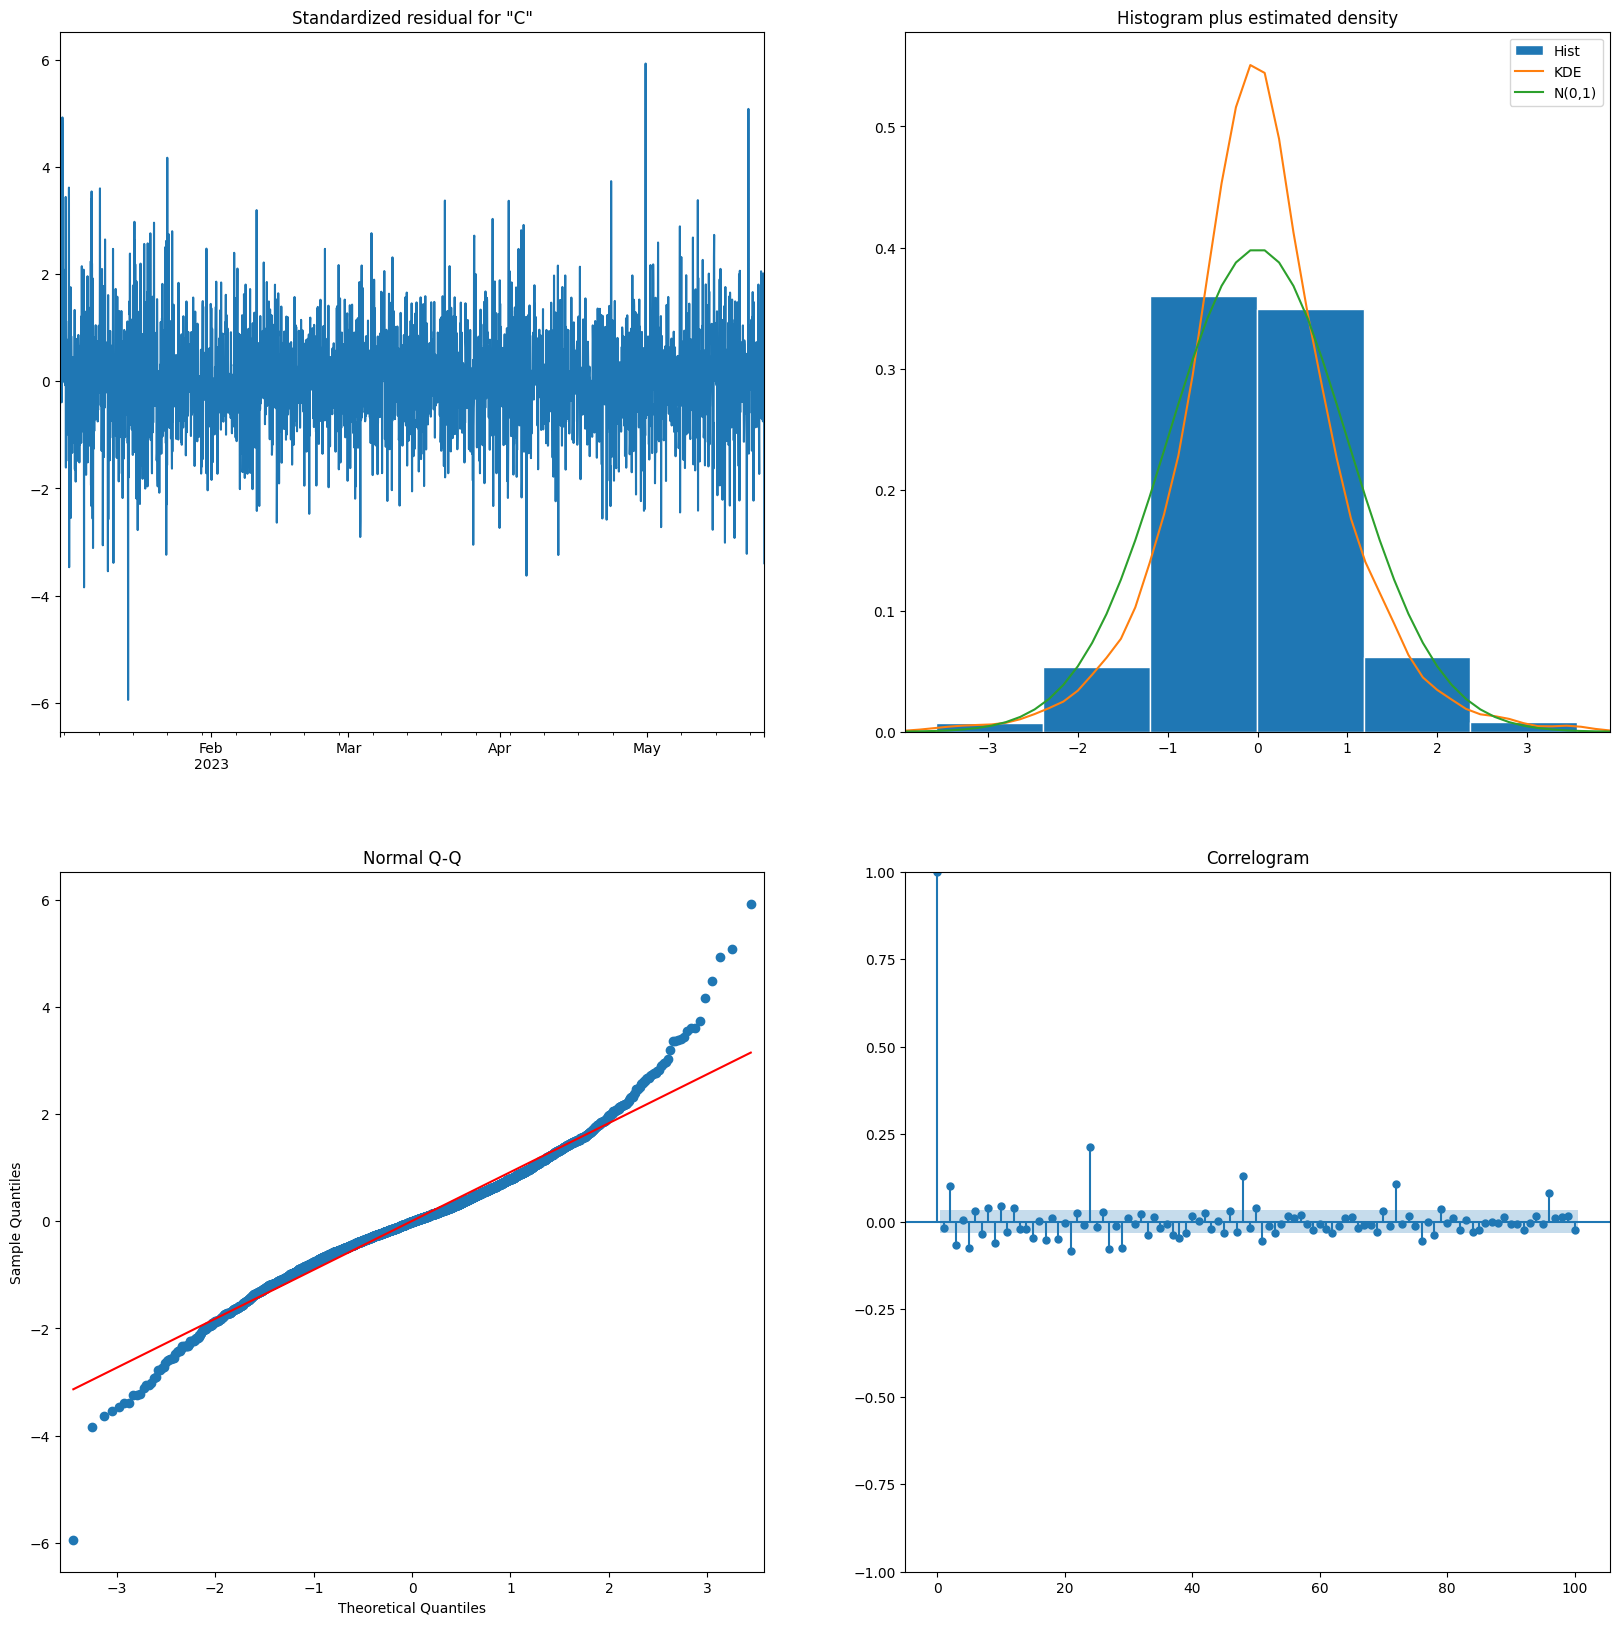

In [13]:
#wykres arimax
# results.plot_diagnostics(figsize=(20,20))
# plt.show()
folder_wynik = r'C:\Users\mikol\OneDrive\Pulpit\data\prognozy\podsumowanie'
filename_wynik = f'wykresy diagnostyczne {predictions1.name}.png'

fig = results1.plot_diagnostics(figsize=(20, 20),lags=100)
fig.savefig(folder_wynik + '\\' + filename_wynik)


In [14]:
########################################################################### SARIMAX 2  #################################################################

 SARIMAX 2 (2, 1, 0) (4, 0, 0, 12) #################################################################

In [15]:
# # Optymalizacja  p, d, q dla m 12
# model2 = auto_arima(ceny_autoAr['Ceny energii'], exogenous=exo_autoAr, d=1, max_p=10, max_q=15, max_P=15, max_Q=15, max_order=None, seasonal=True, m=12)

# print("Optymalne parametry modelu:", model2.order, model2.seasonal_order)

# # Optymalne parametry modelu: (2, 1, 0) (4, 0, 0, 12)


In [16]:
# # Dopasowanie modelu SARIMAX bez sezonowosci - arimax
sarimax_model2 = SARIMAX(train1['Ceny energii'], exog=exog_train, order=(2, 1, 0), seasonal_order=(4, 0, 0, 12))
results2 = sarimax_model2.fit()

#prognoza

predictions2 = results2.predict(start=start1, end=end1, exog=exog_forecast).rename('SARIMAX(2, 1, 0) (4, 0, 0, 12)')

C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Ceny energii   No. Observations:                 3456
Model:             SARIMAX(2, 1, 0)x(4, 0, 0, 12)   Log Likelihood              -16263.153
Date:                            Fri, 25 Aug 2023   AIC                          32556.306
Time:                                    09:39:53   BIC                          32648.520
Sample:                                01-01-2023   HQIC                         32589.238
                                     - 05-24-2023                                         
Covariance Type:                              opg                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Zachmurzenie                         -1.5182      0.658     -2.307      0.021      -2.808      -0.228
Prędkość wiatru                     -12.2266      2.546     -4.803      0.000     -17.216      -7.237
Temperatura powietrza                -4.3101      1.542     -2.795      0.005      -7.333      -1.288
Opad                                 -1.4383      0.608     -2.364      0.018      -2.631      -0.246
Zdolności produkcyjne                -0.0020      0.001     -2.440      0.015      -0.004      -0.000
Zapotrzebowanie                       0.0314      0.001     37.446      0.000       0.030       0.033
Generacja źródeł wiatrowych          -0.0096      0.002     -4.992      0.000      -0.013      -0.006
Generacja źródeł fotowoltaicznych    -0.0212      0.002    -13.162      0.000      -0.024      -0.018
ar.L1                                 0.0840      0.013      6.262      0.000       0.058       0.110
ar.L2                                -0.0207      0.016     -1.306      0.192      -0.052       0.010
ar.S.L12                              0.0683      0.018      3.796      0.000       0.033       0.104
ar.S.L24                              0.2117      0.014     15.146      0.000       0.184       0.239
ar.S.L36                             -0.0292      0.018     -1.666      0.096      -0.063       0.005
ar.S.L48                              0.1112      0.015      7.195      0.000       0.081       0.141
sigma2                              733.8697     11.846     61.953      0.000     710.653     757.087
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):              2175.00
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.26
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

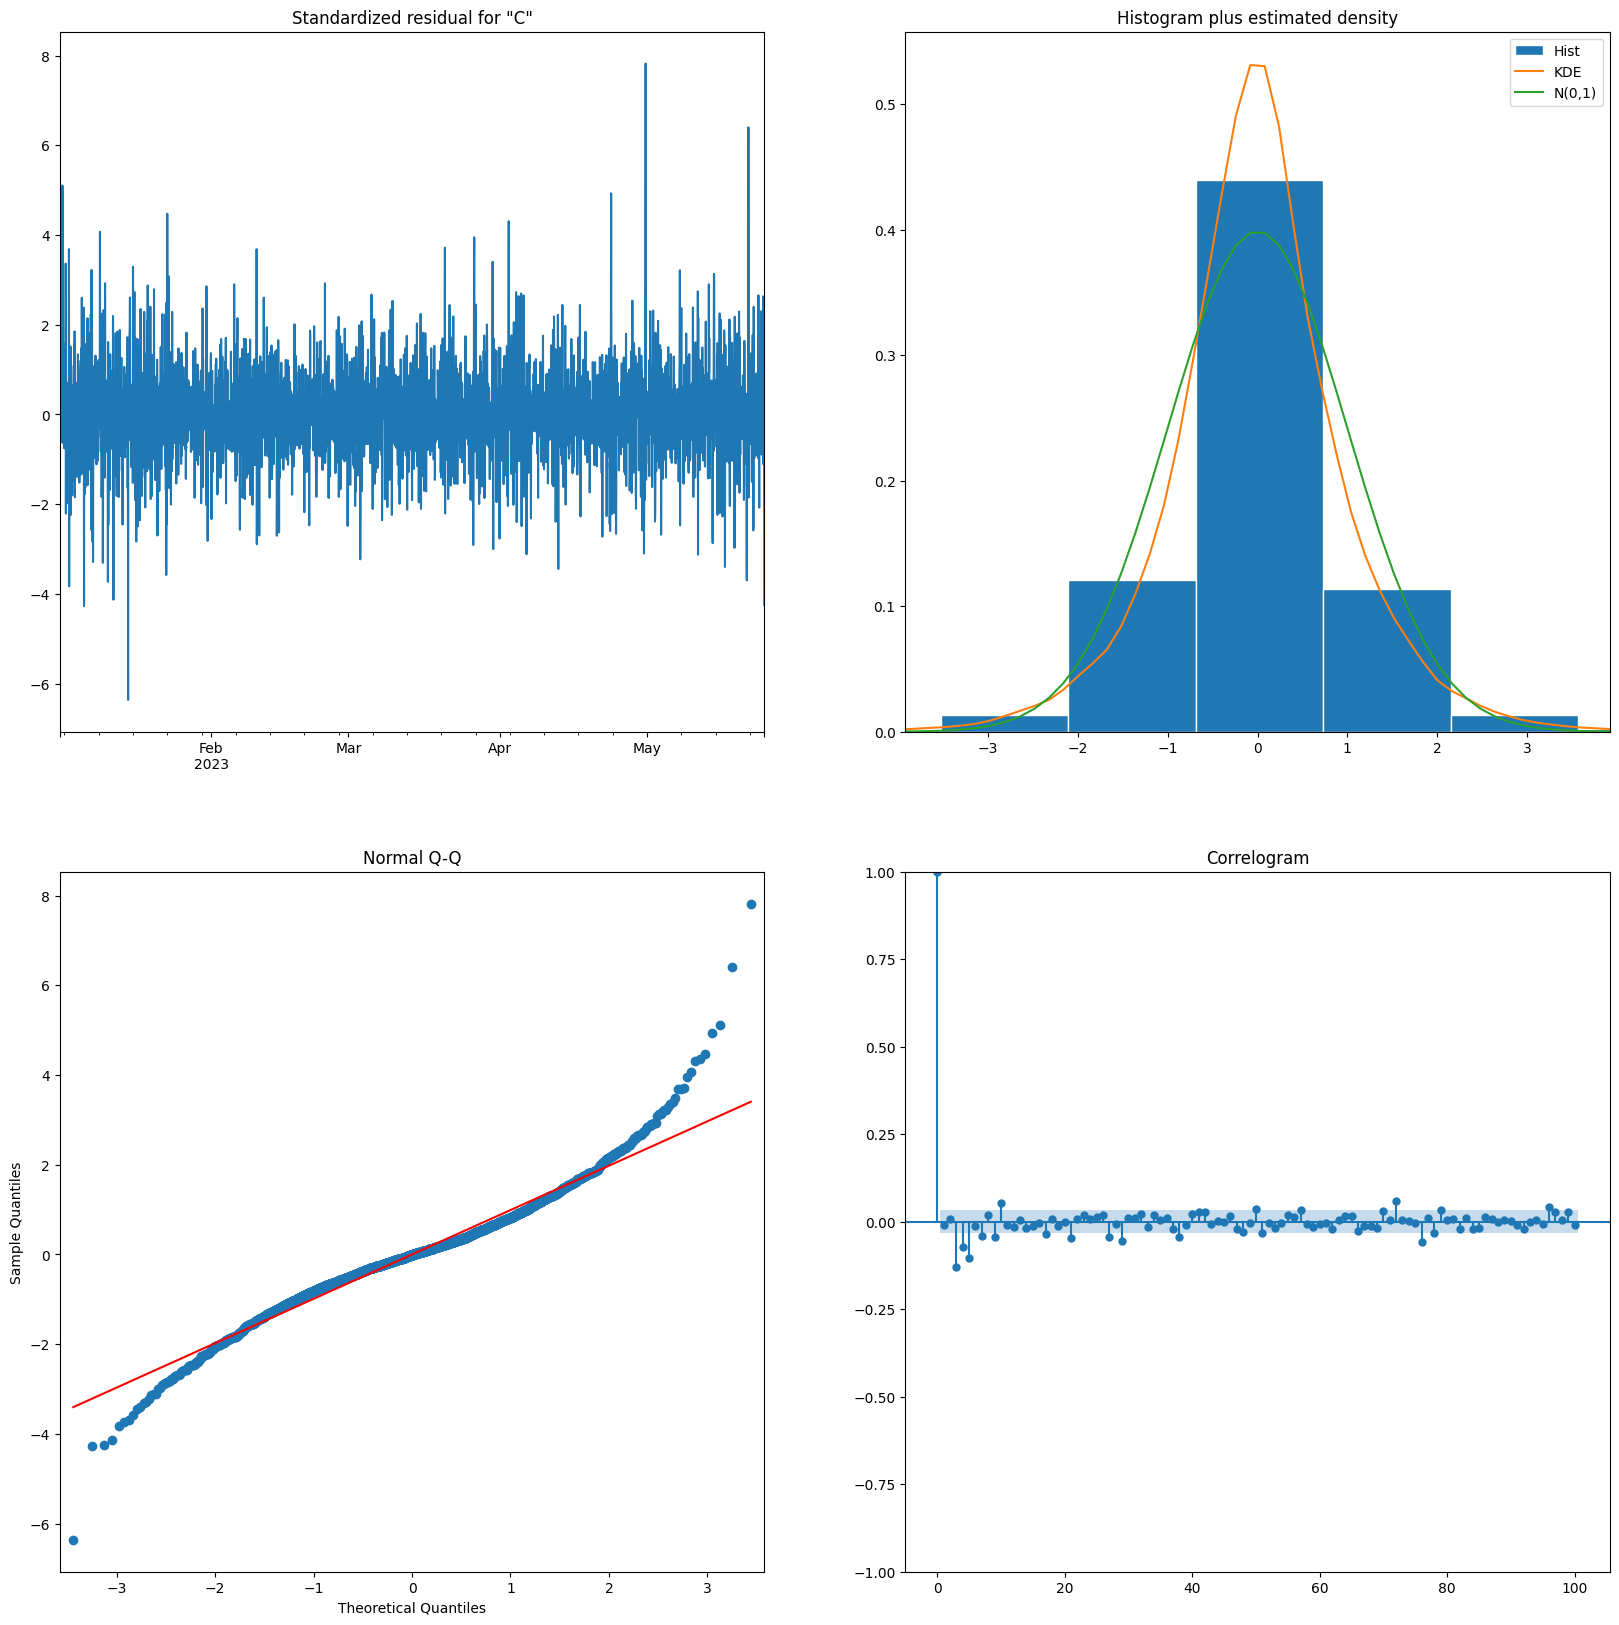

In [18]:
#wykres sarimax m=12
# results.plot_diagnostics(figsize=(20,20))
# plt.show()
folder_wynik = r'C:\Users\mikol\OneDrive\Pulpit\data\prognozy\podsumowanie'
filename_wynik = f'wykresy diagnostyczne {predictions2.name}.png'

fig = results2.plot_diagnostics(figsize=(20, 20), lags=100)
fig.savefig(folder_wynik + '\\' + filename_wynik)

In [19]:
########################################################################### SARIMAX 3  #################################################################

 SARIMAX 3 (2, 1, 0) (4, 0, 0, 12)  #################################################################

In [20]:
# # Optymalizacja  p, d, q dla m 6
# model3 = auto_arima(ceny_autoAr['Ceny energii'], exogenous=exo_autoAr, d=1, max_p=10, max_q=15, max_P=15, max_Q=15, max_order=None, seasonal=True, m=6)

# print("Optymalne parametry modelu:", model3.order, model3.seasonal_order)

# # Optymalne parametry modelu: (2, 1, 0) (4, 0, 0, 12)

In [21]:
# # Dopasowanie modelu SARIMAX m=6
sarimax_model3 = SARIMAX(train1['Ceny energii'], exog=exog_train, order=(2, 1, 0), seasonal_order=(4, 0, 0, 6))
results3 = sarimax_model3.fit()

#prognoza

predictions3 = results3.predict(start=start1, end=end1, exog=exog_forecast).rename('SARIMAX(2, 1, 0) (4, 0, 0, 6)')

C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      Ceny energii   No. Observations:                 3456
Model:             SARIMAX(2, 1, 0)x(4, 0, 0, 6)   Log Likelihood              -16280.284
Date:                           Fri, 25 Aug 2023   AIC                          32590.568
Time:                                   09:41:30   BIC                          32682.782
Sample:                               01-01-2023   HQIC                         32623.500
                                    - 05-24-2023                                         
Covariance Type:                             opg                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Zachmurzenie                         -1.5296      0.615     -2.488      0.013      -2.734      -0.325
Prędkość wiatru                     -12.2169      2.520     -4.849      0.000     -17.155      -7.279
Temperatura powietrza                -4.3221      1.474     -2.931      0.003      -7.212      -1.432
Opad                                 -1.4281      0.608     -2.348      0.019      -2.620      -0.236
Zdolności produkcyjne                -0.0025      0.001     -3.066      0.002      -0.004      -0.001
Zapotrzebowanie                       0.0321      0.001     40.120      0.000       0.031       0.034
Generacja źródeł wiatrowych          -0.0097      0.002     -5.167      0.000      -0.013      -0.006
Generacja źródeł fotowoltaicznych    -0.0214      0.002    -14.164      0.000      -0.024      -0.018
ar.L1                                 0.0758      0.014      5.568      0.000       0.049       0.102
ar.L2                                -0.0340      0.016     -2.131      0.033      -0.065      -0.003
ar.S.L6                              -0.0072      0.017     -0.417      0.676      -0.041       0.027
ar.S.L12                              0.0481      0.017      2.760      0.006       0.014       0.082
ar.S.L18                              0.0110      0.017      0.631      0.528      -0.023       0.045
ar.S.L24                              0.2537      0.013     18.951      0.000       0.227       0.280
sigma2                              734.1402     11.873     61.831      0.000     710.869     757.411
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              1970.11
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

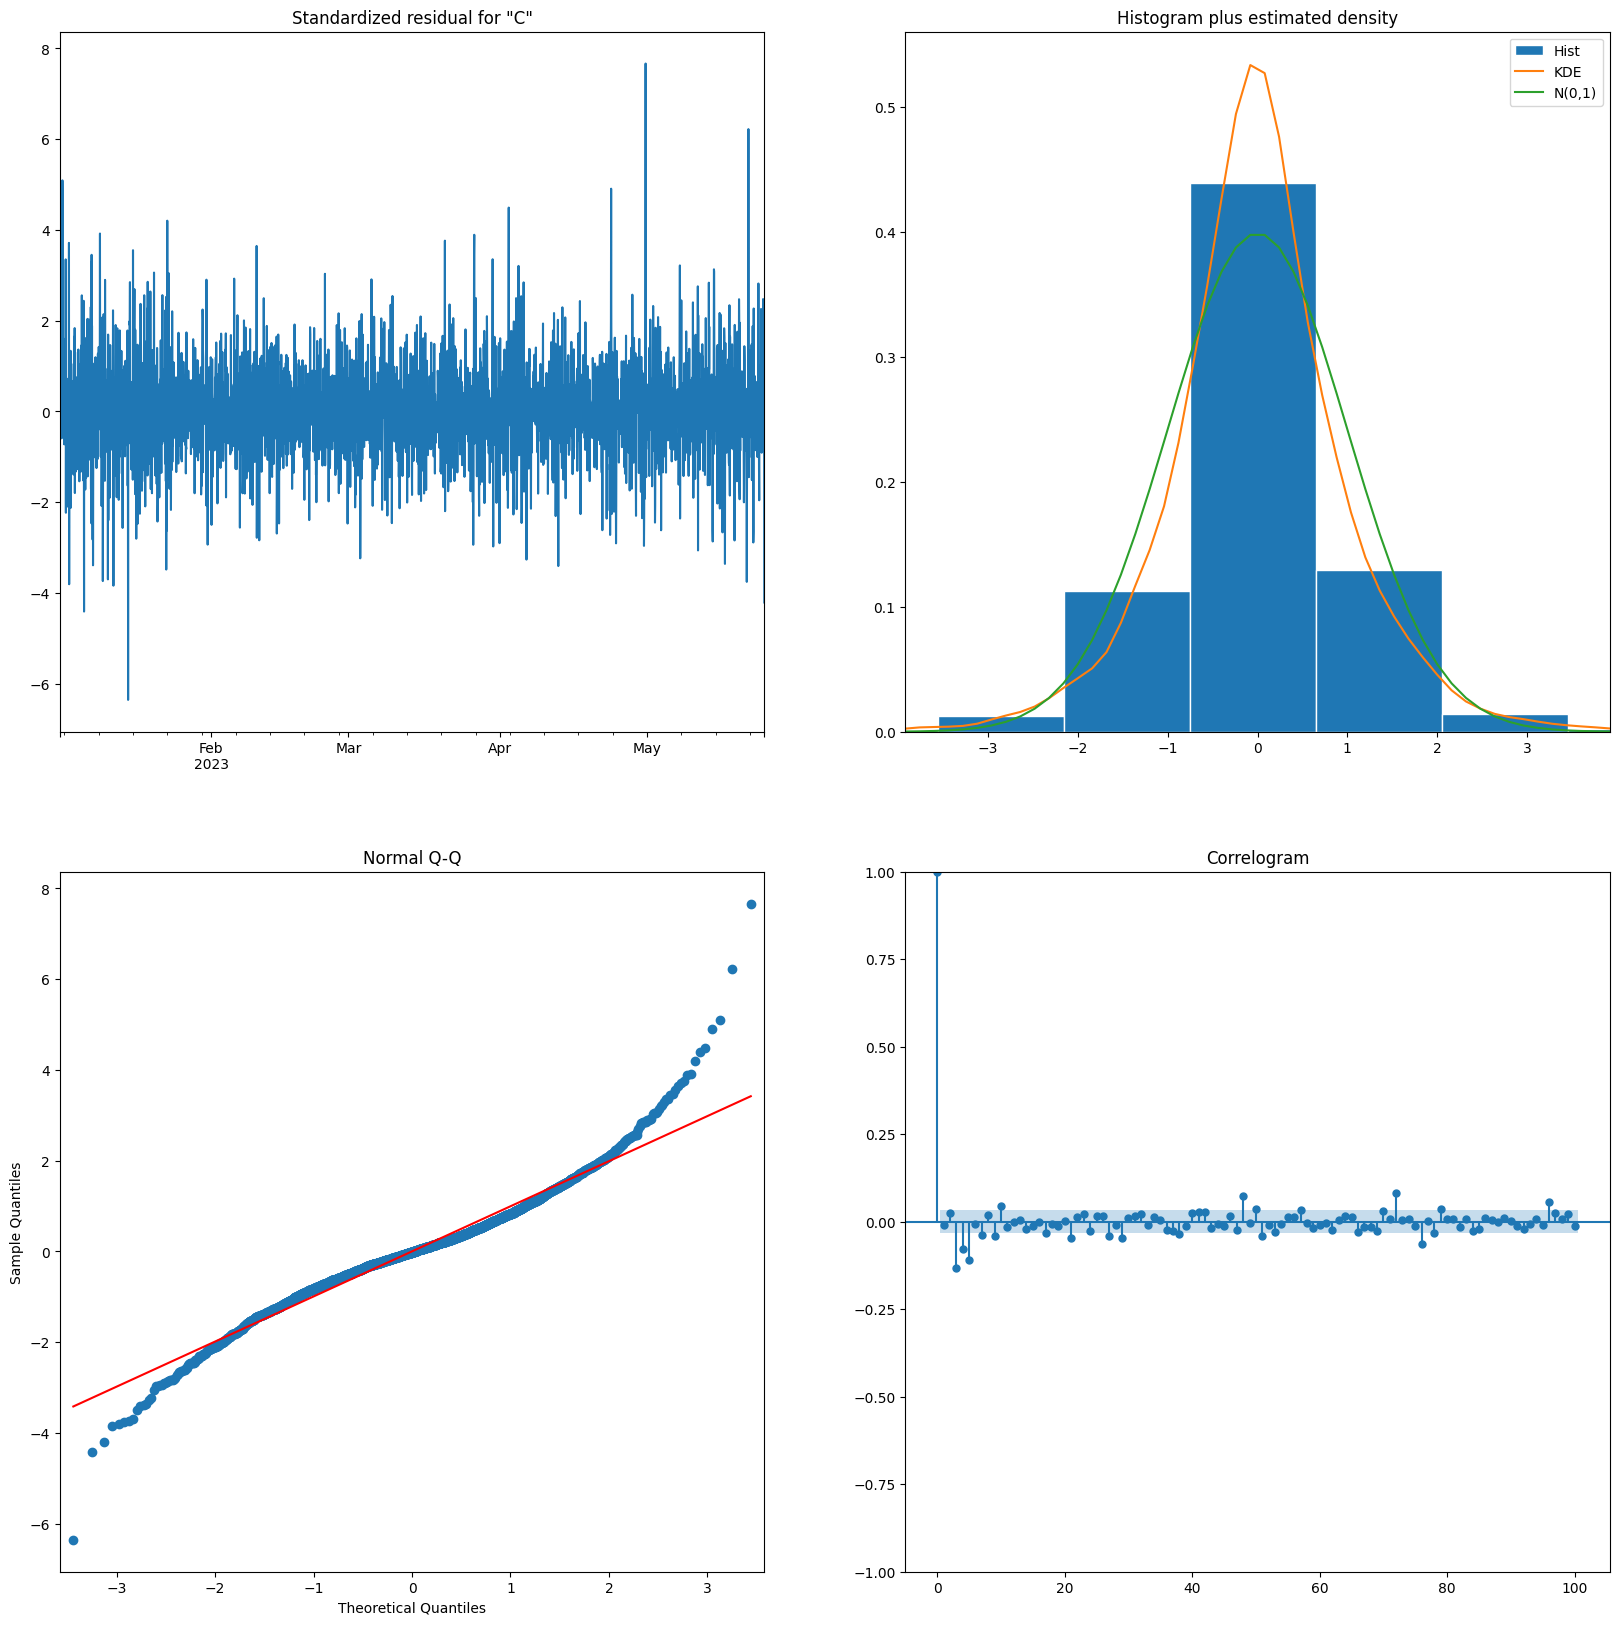

In [23]:
#wykres sarimax m=12
# results.plot_diagnostics(figsize=(20,20))
# plt.show()
folder_wynik = r'C:\Users\mikol\OneDrive\Pulpit\data\prognozy\podsumowanie'
filename_wynik = f'wykresy diagnostyczne {predictions3.name}.png'

fig = results3.plot_diagnostics(figsize=(20, 20), lags=100)
fig.savefig(folder_wynik + '\\' + filename_wynik)

Sarimax dla l=1800 (6, 1, 0) (2, 0, 0, 24) #################################################################

In [34]:
# # Dopasowanie modelu SARIMAX m=6
sarimax_model4 = SARIMAX(train1['Ceny energii'], exog=exog_train, order=(6, 1, 0), seasonal_order=(2, 0, 0, 24))
results4 = sarimax_model4.fit()

#prognoza (6, 1, 0) (2, 0, 0, 24)

predictions4 = results4.predict(start=start1, end=end1, exog=exog_forecast).rename('SARIMAX(6, 1, 0) (2, 0, 0, 24) l=1800')

C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\mikol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Ceny energii   No. Observations:                 3456
Model:             SARIMAX(6, 1, 0)x(2, 0, 0, 24)   Log Likelihood              -16199.846
Date:                            Fri, 25 Aug 2023   AIC                          32433.693
Time:                                    09:59:30   BIC                          32538.202
Sample:                                01-01-2023   HQIC                         32471.015
                                     - 05-24-2023                                         
Covariance Type:                              opg                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Zachmurzenie                         -1.6380      0.646     -2.538      0.011      -2.903      -0.373
Prędkość wiatru                     -12.2550      2.373     -5.164      0.000     -16.906      -7.604
Temperatura powietrza                -4.3429      1.368     -3.176      0.001      -7.023      -1.662
Opad                                 -1.4830      0.602     -2.462      0.014      -2.664      -0.302
Zdolności produkcyjne                -0.0012      0.001     -1.454      0.146      -0.003       0.000
Zapotrzebowanie                       0.0316      0.001     38.746      0.000       0.030       0.033
Generacja źródeł wiatrowych          -0.0130      0.002     -7.082      0.000      -0.017      -0.009
Generacja źródeł fotowoltaicznych    -0.0223      0.001    -15.138      0.000      -0.025      -0.019
ar.L1                                 0.0373      0.014      2.704      0.007       0.010       0.064
ar.L2                                -0.0245      0.016     -1.531      0.126      -0.056       0.007
ar.L3                                -0.1455      0.018     -8.238      0.000      -0.180      -0.111
ar.L4                                -0.0764      0.018     -4.294      0.000      -0.111      -0.042
ar.L5                                -0.1168      0.018     -6.514      0.000      -0.152      -0.082
ar.L6                                -0.0338      0.018     -1.894      0.058      -0.069       0.001
ar.S.L24                              0.2261      0.014     16.178      0.000       0.199       0.253
ar.S.L48                              0.0935      0.015      6.066      0.000       0.063       0.124
sigma2                              708.7577     11.950     59.308      0.000     685.335     732.180
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2005.11
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.26
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

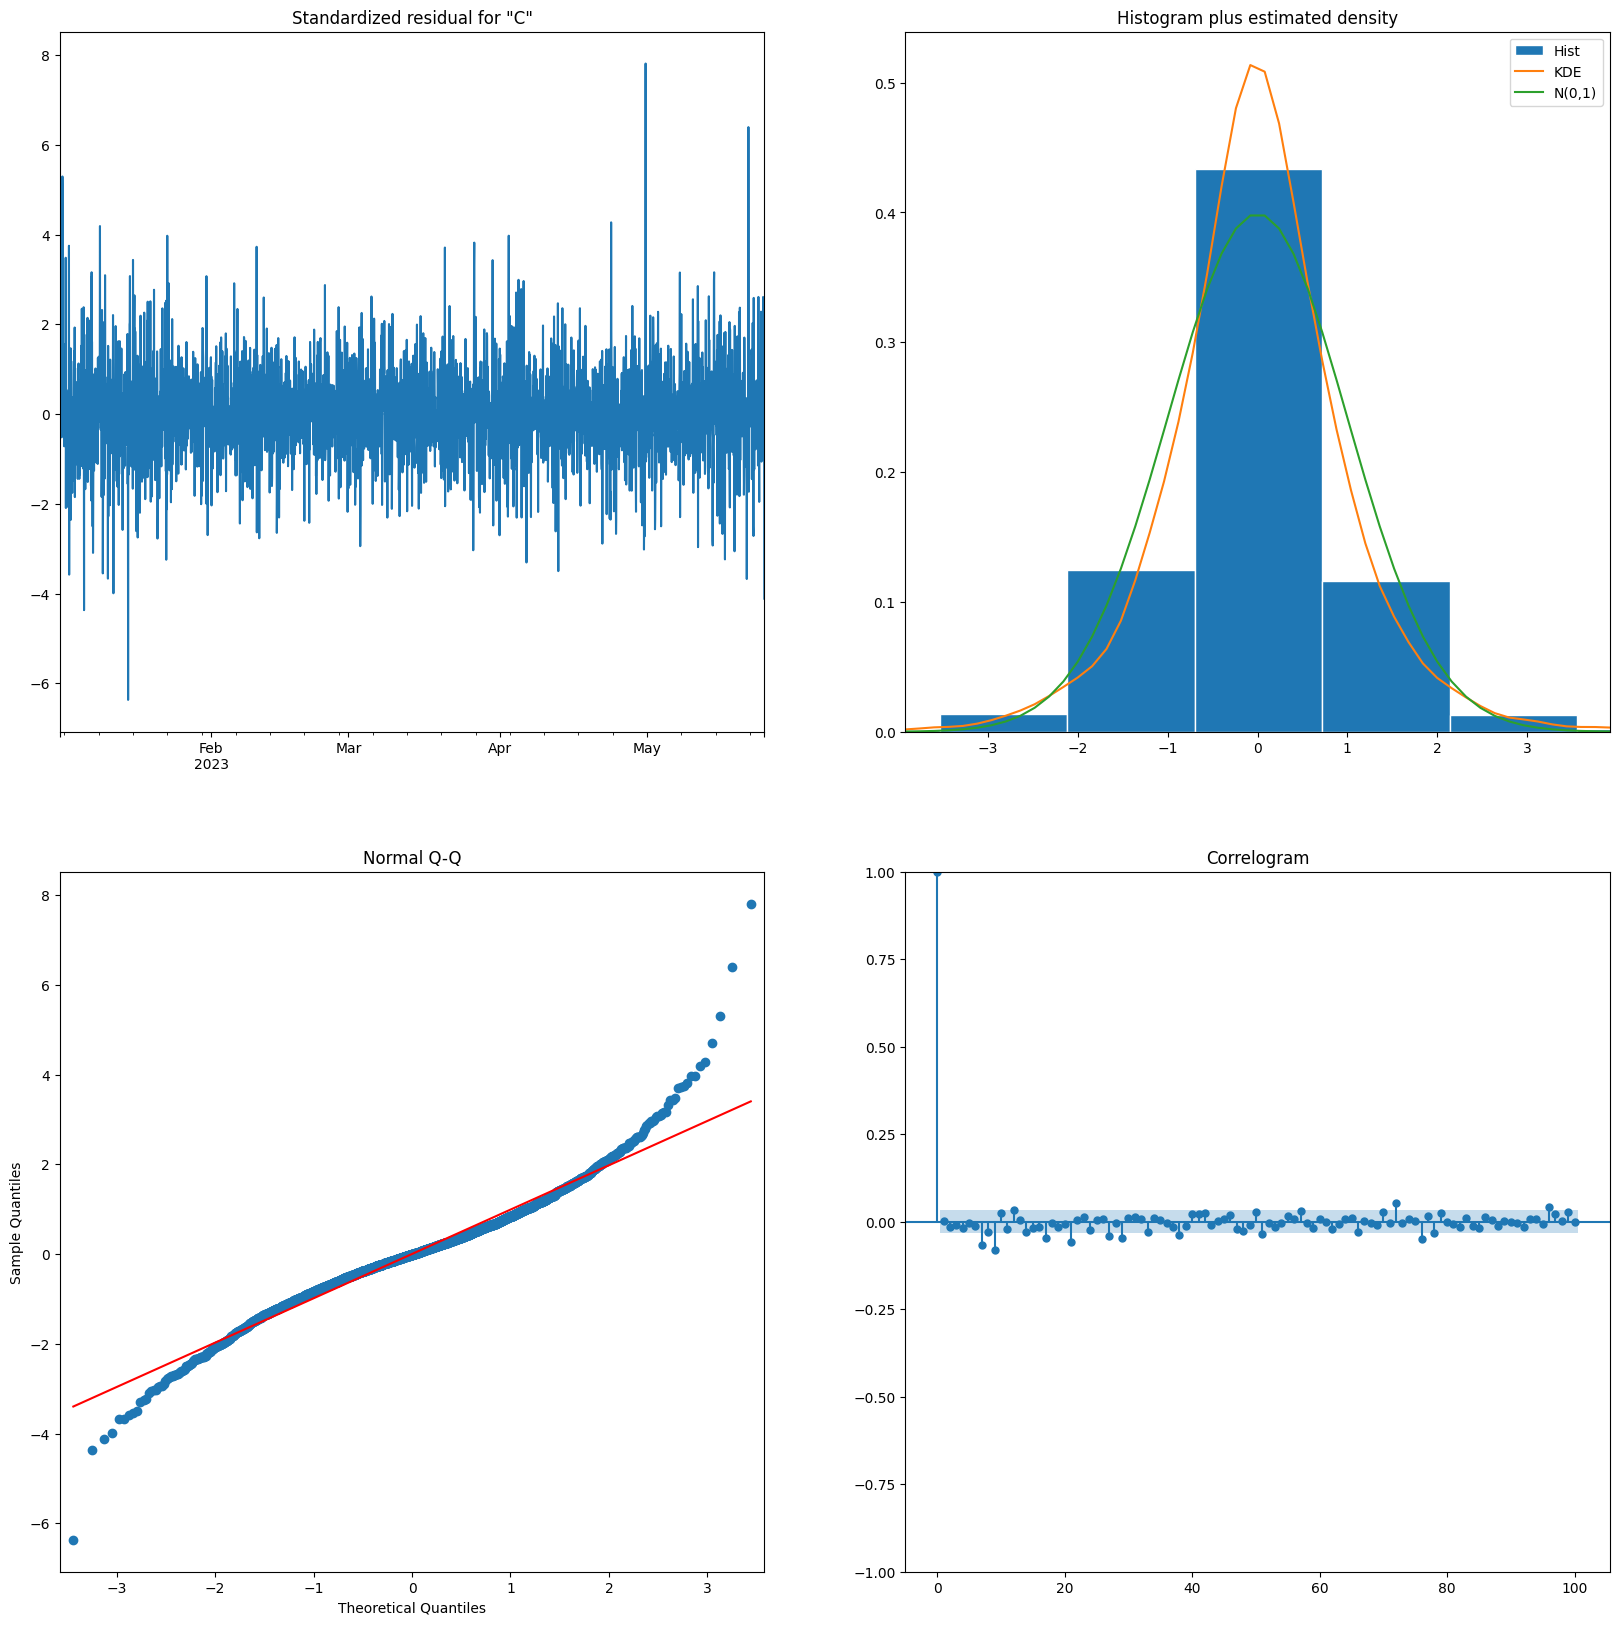

In [35]:
folder_wynik = r'C:\Users\mikol\OneDrive\Pulpit\data\prognozy\podsumowanie'
filename_wynik = f'wykresy diagnostyczne {predictions4.name}.png'

fig = results4.plot_diagnostics(figsize=(20, 20), lags=100)
fig.savefig(folder_wynik + '\\' + filename_wynik)

In [27]:
# from statsmodels.tools.eval_measures import meanabs,mse,rmse,rmspe,stde

# errormeanabs4 = meanabs(test1['Ceny energii'],predictions4)
# errormse4 = mse(test1['Ceny energii'],predictions4)
# errorrmse4 = rmse(test1['Ceny energii'],predictions4)
# errorrmspe4 = rmspe(test1['Ceny energii'],predictions4)
# errorstde4 = stde(test1['Ceny energii'],predictions4)

# print(errormeanabs4,errormse4,errorrmse4,errorrmspe4, errorstde4)



In [28]:
########################################################################### wykresy prognoz  #################################################################

 wykresy prognoz  #################################################################

[Text(0.5, 0, 'Czas[dzień miesiąca]'), Text(0, 0.5, 'Cena energii [Zł/kWh]')]

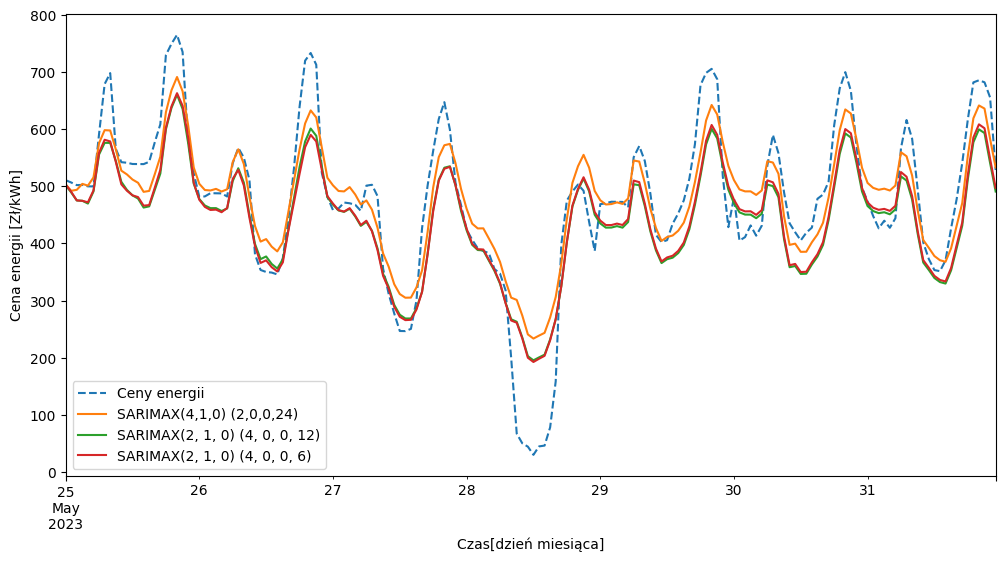

In [42]:
# Wykresy prognozy
ylabel='Cena energii [Zł/kWh]'
xlabel='Czas[dzień miesiąca]'

ax = test1['Ceny energii'].plot(legend=True,figsize=(12,6),linestyle = 'dashed')
predictions.plot(legend=True)
predictions2.plot(legend=True)
predictions3.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)



[Text(0.5, 0, 'Czas[dzień miesiąca]'), Text(0, 0.5, 'Cena energii [Zł/kWh]')]

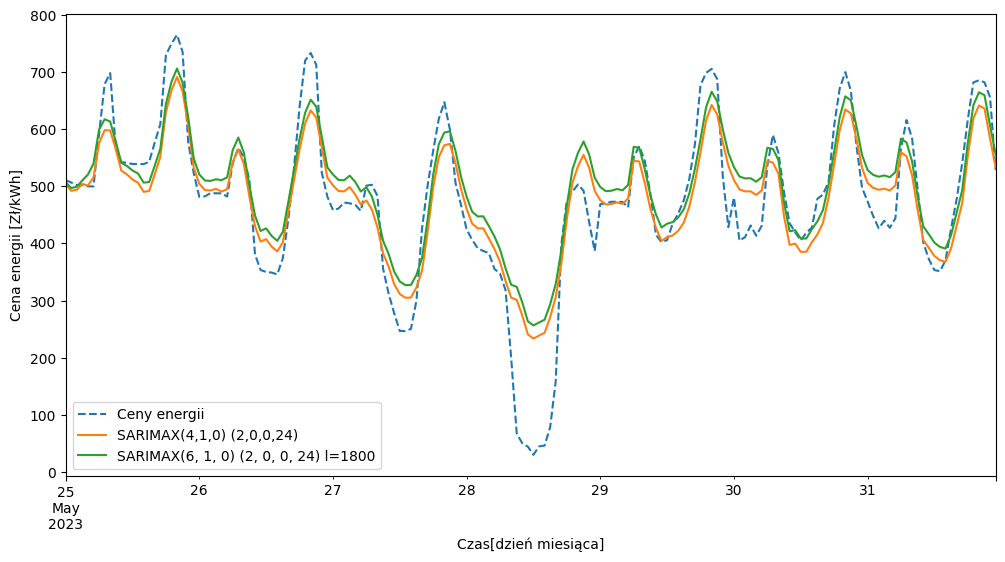

In [38]:
# Wykresy prognozy
ylabel='Cena energii [Zł/kWh]'
xlabel='Czas[dzień miesiąca]'

ax = test1['Ceny energii'].plot(legend=True,figsize=(12,6),linestyle = 'dashed')
predictions.plot(legend=True)
predictions4.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


[Text(0.5, 0, 'Czas[dzień miesiąca]'), Text(0, 0.5, 'Cena energii [Zł/kWh]')]

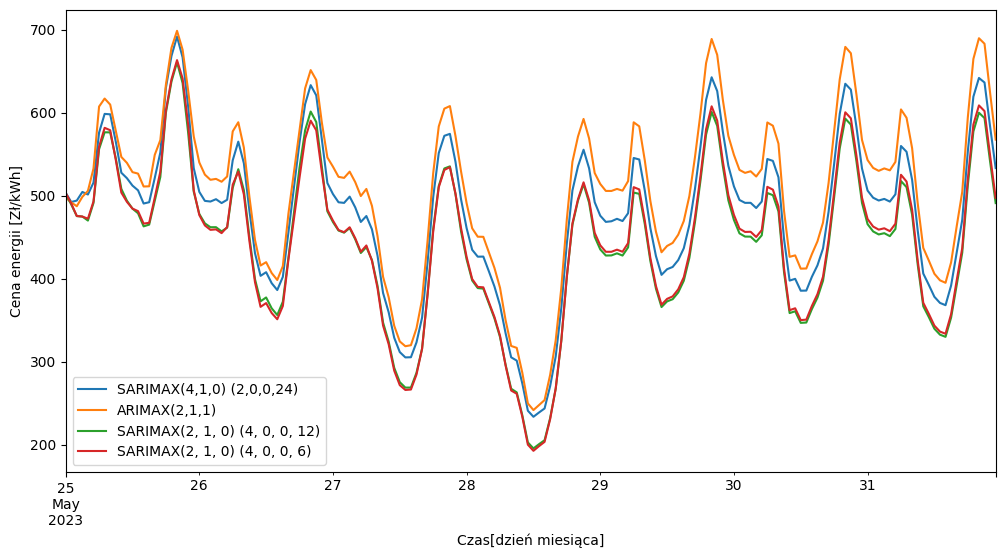

In [40]:
#################Wykres 3
ylabel='Cena energii [Zł/kWh]'
xlabel='Czas[dzień miesiąca]'

ax = predictions.plot(legend=True,figsize=(12,6))
#predictions.plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions3.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


Błędy prognozy ############################################################

In [30]:
# from statsmodels.tools.eval_measures import meanabs,mse,rmse,rmspe,stde


# errormeanabs = meanabs(test1['Ceny energii'],predictions)
# errormeanabs1 = meanabs(test1['Ceny energii'],predictions1)
# errormeanabs2 = meanabs(test1['Ceny energii'],predictions2)
# errormeanabs3 = meanabs(test1['Ceny energii'],predictions3)

# errormse = mse(test1['Ceny energii'],predictions)
# errormse1 = mse(test1['Ceny energii'],predictions1)
# errormse2 = mse(test1['Ceny energii'],predictions2)
# errormse3 = mse(test1['Ceny energii'],predictions3)

# errorrmse = rmse(test1['Ceny energii'],predictions)
# errorrmse1 = rmse(test1['Ceny energii'],predictions1)
# errorrmse2 = rmse(test1['Ceny energii'],predictions2)
# errorrmse3 = rmse(test1['Ceny energii'],predictions3)

# errorrmspe = rmspe(test1['Ceny energii'],predictions)
# errorrmspe1 = rmspe(test1['Ceny energii'],predictions1)
# errorrmspe2 = rmspe(test1['Ceny energii'],predictions2)
# errorrmspe3 = rmspe(test1['Ceny energii'],predictions3)

# errorstde = stde(test1['Ceny energii'],predictions)
# errorstde1 = stde(test1['Ceny energii'],predictions1)
# errorstde2 = stde(test1['Ceny energii'],predictions2)
# errorstde3 = stde(test1['Ceny energii'],predictions3)

# error_metrics = {
#     'SARIMAX (4,1,0) (2,0,0,24)': [errormeanabs, errormse, errorrmse, errorrmspe, errorstde],
#     'ARIMAX (2,1,1)': [errormeanabs1, errormse1, errorrmse1, errorrmspe1, errorstde1],
#     'SARIMAX (2, 1, 0) (4, 0, 0, 12)': [errormeanabs2, errormse2, errorrmse2, errorrmspe2, errorstde2],
#     'SARIMAX (2, 1, 0) (4, 0, 0, 6)': [errormeanabs3, errormse3, errorrmse3, errorrmspe3, errorstde3]
# }

# # Create a DataFrame using the dictionary
# miary_dopasowania_df = pd.DataFrame(error_metrics, index=['Średni błąd bezwzględny (MAE)', 'Średni błąd kwadratowy (MSE)', 'Pierwiastek błędu średniokwadratowego (RMSE)', 
#             'Pierwiastek średniego błędu procentowego (RMSPE)', 'Standard Error(STDE)'])

# # Save the DataFrame to an Excel file

# miary_dopasowania_df.to_excel(folder_wynik + '\\' + 'error_metrics.xlsx', index=True)

# print("Results saved to:", excel_file_path)


# # folder_wynik = r'C:\Users\mikol\OneDrive\Pulpit\data\prognozy\podsumowanie'
# # filename_wynik = f'wykresy diagnostyczne {predictions3.name}.png'

# # fig = results3.plot_diagnostics(figsize=(20, 20))
# # fig.savefig(folder_wynik + '\\' + filename_wynik)

 test i standaryzacja  #################################################################

In [31]:
# # run ADF test
# from statsmodels.tsa.stattools import adfuller

# def adf_test(series,title=''):
#     print(f'Augmented Dickey-Fuller Test: {title}')
#     result = adfuller(series.dropna(),autolag='AIC') 
    
#     labels = ['ADF test statistic','p-value','# lags used','# observations']
#     out = pd.Series(result[0:4],index=labels)

#     for key,val in result[4].items():
#         out[f'critical value ({key})']=val
        
#     print(out.to_string())          
    
#     if result[1] <= 0.05:
#         print("Strong evidence against the null hypothesis")
#         print("Reject the null hypothesis")
#         print("Data has no unit root and is stationary")
#     else:
#         print("Weak evidence against the null hypothesis")
#         print("Fail to reject the null hypothesis")
#         print("Data has a unit root and is non-stationary")
        
# # use ADF function       
# adf_test(ceny_df['Ceny energii'])

In [32]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# plt.rc('figure',figsize=(20,20))
# plt.rc('font',size=15)

# result = seasonal_decompose(ceny_df['Ceny energii'],model='additive')
# fig = result.plot()

In [33]:

# results.save('results.csv')